<a href="https://colab.research.google.com/github/kilaspintas/ai_project/blob/master/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download dataset
!wget --no-check-certificate \
    https://github.com/kilaspintas/ai_project/raw/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip \
    -O /tmp/kemangi_dan_jambuBiji.zip

--2022-11-09 16:25:03--  https://github.com/kilaspintas/ai_project/raw/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kilaspintas/ai_project/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip [following]
--2022-11-09 16:25:03--  https://raw.githubusercontent.com/kilaspintas/ai_project/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40446413 (39M) 

In [2]:
import os
import zipfile

local_zip = '/tmp/kemangi_dan_jambuBiji.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
base_dir = '/tmp/Dataset-Kemangi dan Jambu Biji_139_128/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_jambu = os.path.join(train_dir, 'jambuBiji')
train_kemangi = os.path.join(train_dir, 'kemangi')

validation_jambu = os.path.join(validation_dir, 'jambuBiji')
validation_kemangi = os.path.join(validation_dir, 'kemangi')

In [9]:
# Cek penamaan image yang ada di folder train_jambu dan train_kemangi
print(os.listdir(train_jambu)[:20])
print(os.listdir(train_kemangi)[:20])

['007_j.jpg', '002_j.jpg', '006_j.jpg', '005_j.jpg', '008_j.jpg', '001_j.jpg', '014_j.jpg', '018_j.jpg', '015_j.jpg', '003_j.jpg', '012_j.jpg', '010_j.jpg', '020_j.jpg', '009_j.jpg', '016_j.jpg', '011_j.jpg', '004_j.jpg', '017_j.jpg', '019_j.jpg', '013_j.jpg']
['020_k.jpg', '003_k.jpg', '001_k.jpg', '018_k.jpg', '012_k.jpg', '005_k.jpg', '007_k.jpg', '009_k.jpg', '017_k.jpg', '004_k.jpg', '013_k.jpg', '019_k.jpg', '008_k.jpg', '016_k.jpg', '006_k.jpg', '011_k.jpg', '010_k.jpg', '015_k.jpg', '014_k.jpg', '002_k.jpg']


In [10]:
# Cek jumlah data train dan data validation
print('total training jambu images:', len(os.listdir(train_jambu)))
print('total training kemangi images:', len(os.listdir(train_kemangi)))
print('total validation jambu images:', len(os.listdir(validation_jambu)))
print('total validation kemangi images:', len(os.listdir(validation_kemangi)))

total training jambu images: 20
total training kemangi images: 20
total validation jambu images: 30
total validation kemangi images: 30


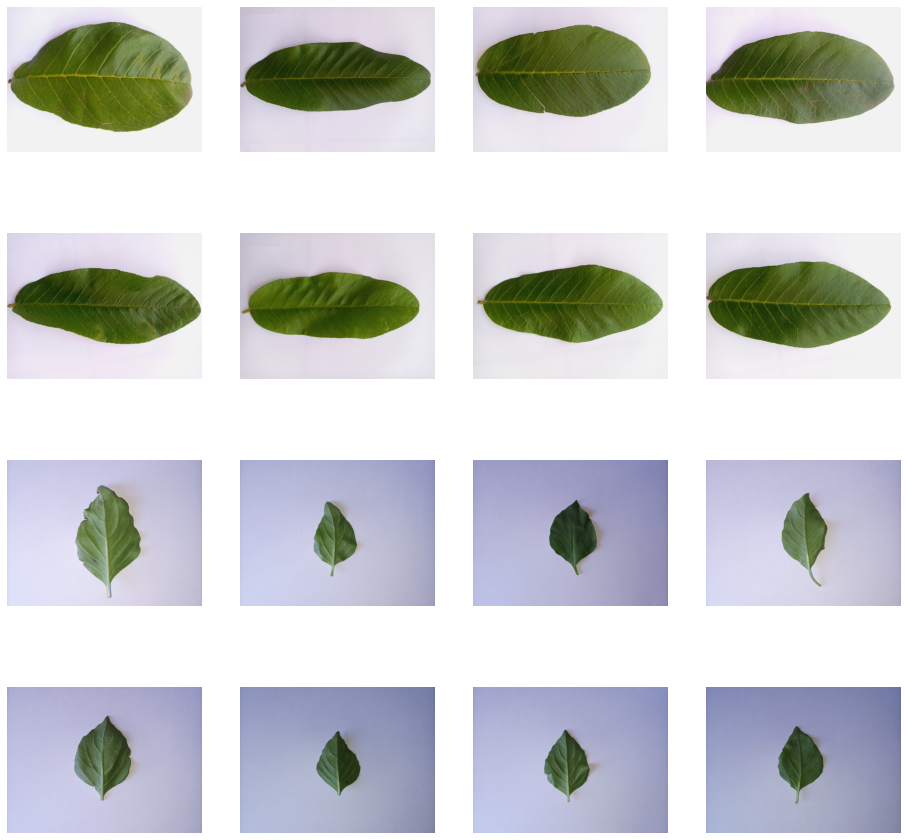

In [30]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_jambu_pix = [os.path.join(train_jambu, fname) 
                for fname in os.listdir(train_jambu)[pic_index-8:pic_index]]
next_kemangi_pix = [os.path.join(train_kemangi, fname) 
                for fname in os.listdir(train_kemangi)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jambu_pix+next_kemangi_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [13]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [14]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [15]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (40, 150, 150, 3)
Train Label =  (40,)
Validation Data =  (60, 150, 150, 3)
Validation Label =  (60,)


In [16]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [242 221 229]
Data setelah di-normalisasi  [0.9490196 0.8666667 0.8980392]


In [17]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[0:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[0:40])

Label sebelum di-encoder  ['jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


<h3>Definisikan Model</h3>

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [20]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [24]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
2/2 [==============================] - 1s 292ms/step - loss: 26.8844 - acc: 0.5000 - val_loss: 0.0184 - val_acc: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 107ms/step - loss: 12.6487 - acc: 0.7000 - val_loss: 0.3148 - val_acc: 0.9667
Epoch 3/50
2/2 [==============================] - 0s 100ms/step - loss: 0.0137 - acc: 1.0000 - val_loss: 1.9891 - val_acc: 0.6667
Epoch 4/50
2/2 [==============================] - 0s 109ms/step - loss: 0.6772 - acc: 0.9000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 99ms/step - loss: 8.1666e-09 - acc: 1.0000 - val_loss: 4.8449e-11 - val_acc: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 115ms/step - loss: 1.5417e-15 - acc: 1.0000 - val_loss: 1.2101e-17 - val_acc: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 109ms/step - loss: 2.0283e-19 - acc: 1.0000 - val_loss: 7.5033e-23 - val_acc: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 106ms/step -

<h3>Evaluasi Model</h3>

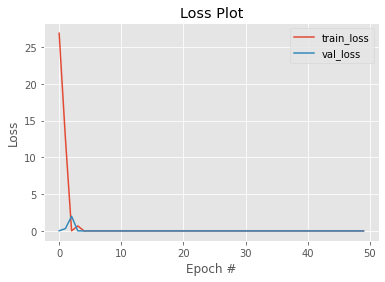

In [25]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

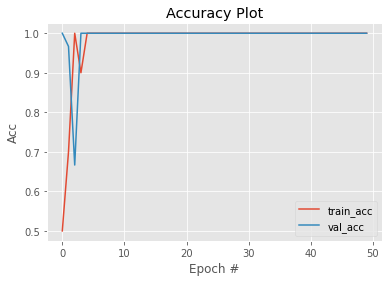

In [26]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(int)

print(classification_report(y_val, labels))

2/2 [==============================] - 0s 25ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

